## Introduction to Homework

Total Marks 100 points

Extra Credit 30 points


In this homework, you will create machine learning models using K Nearest Neighbor, Decision Tree and Random Forests for Fashion MNIST dataset. Specific instruction for that part of the problem can be found in the corresponding cells above the code. 

Note, you only know the labels of the training dataset. The labels of the test dataset are hidden from you. You will perfrom model selection with cross-validation on the training set.  

After obtaining parameters, use the code given to generate submissions, and upload you submissions to Kaggle. Kaggle score tells you, the performance of your model with respect to the test dataset. You can try and fine tune your parameters to be in the top 20 percent of the submissions for extra credit of 20 points. 

How to participate in the kaggle Competition:

1. Create an account on Kaggle.com
2. Use the link https://www.kaggle.com/c/ece597-697/ to join the competition. Please ensure that you only join using one account. At the top of the jupyter notebook, pdf(s) mention the name you have used for submission. 
3. Replace the classifier "xgb_clf" with the corresponding classifier for your submission(KNN or Decision Tree or Random Forest) and generate submission.csv
4. Upload the submission.csv to see your score on the leaderboard
5. To gain extra credit points, try to score higher on the leaderboard


Bonous Tips:

1. You can directly run this notebook on Google colab if your machine is slower. Upload the data and get started!

2. Go through the documentation of sklearn carefully.

3. Don't try to run the code for all 60,000 data points. Rather first try to verify implementation using 10,000 data points, scale it up to 60,000. If you don't do this, you'll spend lot more time debugging between each iteration. Make the code work first. 

4. Complete all the classifiers before trying to optimize based on the leaderboard.

5. For cross-validation, you can use gridsearchcv

6. Start early! It will give you more time to improve your kaggle leaderboard

Good Luck!

x_train shape:  (60000, 784)
y_train shape : (60000,)
x_test shape:  (10000, 784)


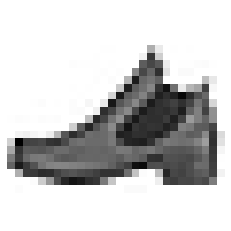

9


In [ ]:
## Code to load data from train and test csv(s)

import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

X_train = train.iloc[:,2:].to_numpy()
y_train = train.iloc[:,:1].to_numpy()

m,n = y_train.shape

y_train = y_train.reshape(m)

X_test = test.iloc[:,1:].to_numpy()


def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()



print('x_train shape: ', X_train.shape)
print('y_train shape :', y_train.shape)

print('x_test shape: ', X_test.shape)
# print('y_test shape :', y_test.shape)

showImage(X_train[1])
print(y_train[1])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

##KNN Classifier

(20 points)Implement a KNN classifier with 5-fold cross validation. What is the best value of n that you obtained? What happens if you increase value of n more than your best value? Use {3, 5, 7, 9, 11} values for n. 

No need to submit KNN predictions on Kaggle.

(5 points) What is the time complexity of the k-NN algorithm with naive search approach? How can you improve upon the naive search to reduce the time complexity? 


## Decision Tree Classifier 1

(10 points) Train five different decision trees. Use the following max depths (10, 11, 12, 13, 14) How does the maximum depth of the tree affect the estimated accuracy? Explain in at most 4 sentences. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set using Kagglization code given at the end of the notebook. Upload your predictions to Kaggle and report the
accuracy on the public leaderboard by pasting a screenshot in your code.pdf. Is the predicted accuracy close to that of the test set? Make sure that your report clearly states which model was chosen and why.

(5 points) What does default value ccp_alpha=0.0 signify for the decision tree classifier?





## Decision Tree Classifier 2

(10 points) Train five different decision trees using five-fold cross validation. Use the following values for max depth (10, 13, 16, 19). Keep all the other parameters to default value. How does the maximum depth of the tree affect the estimated accuracy? Explain in at most 4 sentences. Choose the model with lowest estimated out of sample error, train it with the full training set, and predict the labels for the images in the test set. Finally using Kagglization code given at the end of the notebook generate predictions. Upload your predictions to Kaggle as well as report the position on the public leaderboard by pasting a screenshot in your code.pdf. Is the accuracy obtained on training set, close to that of the test set(kaggle leaderboard)? Make sure that your report clearly states which max depth was chosen and why.

(10 points) Compare the best tree obtained for max-depth, with the best tree classifier obtained for ccp_alpha. Is there a difference in their errors? Why?





## Random Forest Classifier 

(20 points) Create a random forest with 150 estimators and using out of bag classification score set to True. 

Create another random forest with 150 estimators without using out of bag score and bootstrap. Cross validate over 'max_features' with values [10,28,50]. 

Use the best random forest out of all the forests you created to predict labels in test.csv. Generate predictions using the kagglization code given at the end of the notebook. Upload your predictions obtained to Kaggle and report the accuracy on the public leaderboard by pasting a screenshot in the code.pdf. Is the predicted accuracy close to that of the test set? Make sure that your report clearly states which model was chosen and why?

(5 points) Compare the output of both the forests.



(15 points) Can you visualize the most important Random Forest Classifier features?  (Hint: Obtain feature importances and visualize them by reshaping the data)


## Extra credit

(10 points) Can you sort and remove features that insignificant, to improve the testing time? Show this using code that removing certain features doesn't drastically change the error, but improves speed of testing. 

## Kagglization code 

use this code to generate prediction.csv for you classifier. Upload the predictions to the kaggle competition. Replace xgb_clf by corresponding classifier to obtain your prediction.csv



In [ ]:
## code to generate predictions

import csv

predictions = np.zeros(10000,)
for i in range(0,10000):
  predictions[i] = int((xgb_clf.predict(X_test[i].reshape(1, -1)))) ## make change in this line for each classifier upload output from Decision Tree and random forest on Kaggle!

# pd
prediction = pd.DataFrame(predictions, columns=['label']).astype(int).to_csv('prediction.csv')

format_read=pd.read_csv("prediction.csv")
format_read.columns = ["id","label"]
format_read.to_csv("prediction.csv",index=False)